In [ ]:
#(Decision Tree, Random Forest, Bagging, AdaBoost, SVM, and MLP)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['CM1.csv']))

Saving CM1.csv to CM1.csv


In [ ]:
data

,id,LOC_BLA0K,BRA0CH_COU0T,CALL_PAIRS,LOC_CODE_A0D_COMME0T,LOC_COMME0TS,CO0DITIO0_COU0T,C1CLOMATIC_COMPLEXIT1,C1CLOMATIC_DE0SIT1,DECISIO0_COU0T,...,0ODE_COU0T,0ORMALIZED_C1LOMATIC_COMPLEXIT1,0UM_OPERA0DS,0UM_OPERATORS,0UM_U0IQUE_OPERA0DS,0UM_U0IQUE_OPERATORS,0UMBER_OF_LI0ES,PERCE0T_COMME0TS,LOC_TOTAL,Defective
0,1,9,5,3,2,2,8,3,0.16,4,...,10,0.10,36,66,21,17,31,19.05,19,0
1,2,19,3,1,2,0,4,2,0.06,2,...,23,0.04,66,69,34,12,55,5.71,35,0
2,3,0,9,0,0,0,10,5,0.56,2,...,9,0.50,10,21,7,9,10,0.00,9,0
3,4,2,15,2,1,9,24,8,0.19,10,...,18,0.15,67,120,43,19,54,19.61,42,0
4,5,5,5,1,0,0,8,3,0.15,4,...,9,0.12,25,46,17,14,26,0.00,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,8,7,0,2,14,10,4,0.24,4,...,9,0.17,19,33,11,17,23,51.61,17,0
323,324,49,41,14,16,37,78,21,0.28,38,...,85,0.13,319,502,96,45,163,46.90,76,0
324,325,17,21,7,0,8,36,11,0.20,16,...,44,0.14,88,129,41,25,81,12.70,55,0
325,326,1,3,4,0,3,4,2,0.11,2,...,8,0.08,20,42,17,16,24,13.64,19,0


In [ ]:
import pandas as pd

# Assuming `data` is a NumPy array
df = pd.DataFrame(data)  # Convert to a DataFrame

X = df.iloc[:, :-1]  # Perform indexing on the DataFrame
y = df.iloc[:, -1]


In [ ]:
from sklearn.impute import SimpleImputer

# impute missing values with mean of respective feature columns
imp_mean = SimpleImputer(strategy='mean')
X = imp_mean.fit_transform(data)

# select k best features
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
X = selector.transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [ ]:
data

,id,LOC_BLA0K,BRA0CH_COU0T,CALL_PAIRS,LOC_CODE_A0D_COMME0T,LOC_COMME0TS,CO0DITIO0_COU0T,C1CLOMATIC_COMPLEXIT1,C1CLOMATIC_DE0SIT1,DECISIO0_COU0T,...,0ODE_COU0T,0ORMALIZED_C1LOMATIC_COMPLEXIT1,0UM_OPERA0DS,0UM_OPERATORS,0UM_U0IQUE_OPERA0DS,0UM_U0IQUE_OPERATORS,0UMBER_OF_LI0ES,PERCE0T_COMME0TS,LOC_TOTAL,Defective
0,1,9,5,3,2,2,8,3,0.16,4,...,10,0.10,36,66,21,17,31,19.05,19,0
1,2,19,3,1,2,0,4,2,0.06,2,...,23,0.04,66,69,34,12,55,5.71,35,0
2,3,0,9,0,0,0,10,5,0.56,2,...,9,0.50,10,21,7,9,10,0.00,9,0
3,4,2,15,2,1,9,24,8,0.19,10,...,18,0.15,67,120,43,19,54,19.61,42,0
4,5,5,5,1,0,0,8,3,0.15,4,...,9,0.12,25,46,17,14,26,0.00,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,8,7,0,2,14,10,4,0.24,4,...,9,0.17,19,33,11,17,23,51.61,17,0
323,324,49,41,14,16,37,78,21,0.28,38,...,85,0.13,319,502,96,45,163,46.90,76,0
324,325,17,21,7,0,8,36,11,0.20,16,...,44,0.14,88,129,41,25,81,12.70,55,0
325,326,1,3,4,0,3,4,2,0.11,2,...,8,0.08,20,42,17,16,24,13.64,19,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

classifiers = [('Decision Tree', dt_clf),

               ('Random Forest', rf_clf),

               ('Bagging', bagging_clf),

               ('AdaBoost', adaboost_clf),

               ('SVM', svm_clf),

               ('MLP', mlp_clf)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for clf_name, clf in classifiers:
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{clf_name}: Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Decision Tree: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Random Forest: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Bagging: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
AdaBoost: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
SVM: Accuracy: 0.8333333333333334, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
MLP: Accuracy: 0.8333333333333334, Precision: 0.5, Recall: 0.18181818181818182, F1 Score: 0.26666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
voting_clf = VotingClassifier(classifiers, voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Ensemble Learners Voting: Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Ensemble Learners Voting: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf_name, clf in classifiers]
precision_scores = [precision_score(y_test, clf.predict(X_test)) for clf_name, clf in classifiers]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True:  42 False:  285


<Axes: >

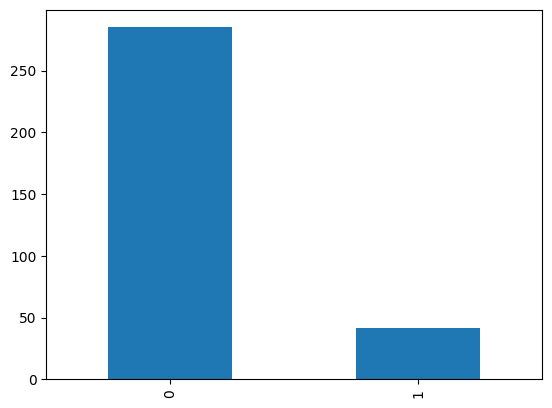

In [ ]:
# label classification
defects_true_false = data.groupby('Defective')['CALL_PAIRS'].apply(lambda x: x.count())
print('True: ', defects_true_false[1], 'False: ', defects_true_false[0])
data.Defective.value_counts().plot.bar()

<ipython-input-22-ea4ce21f6608>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


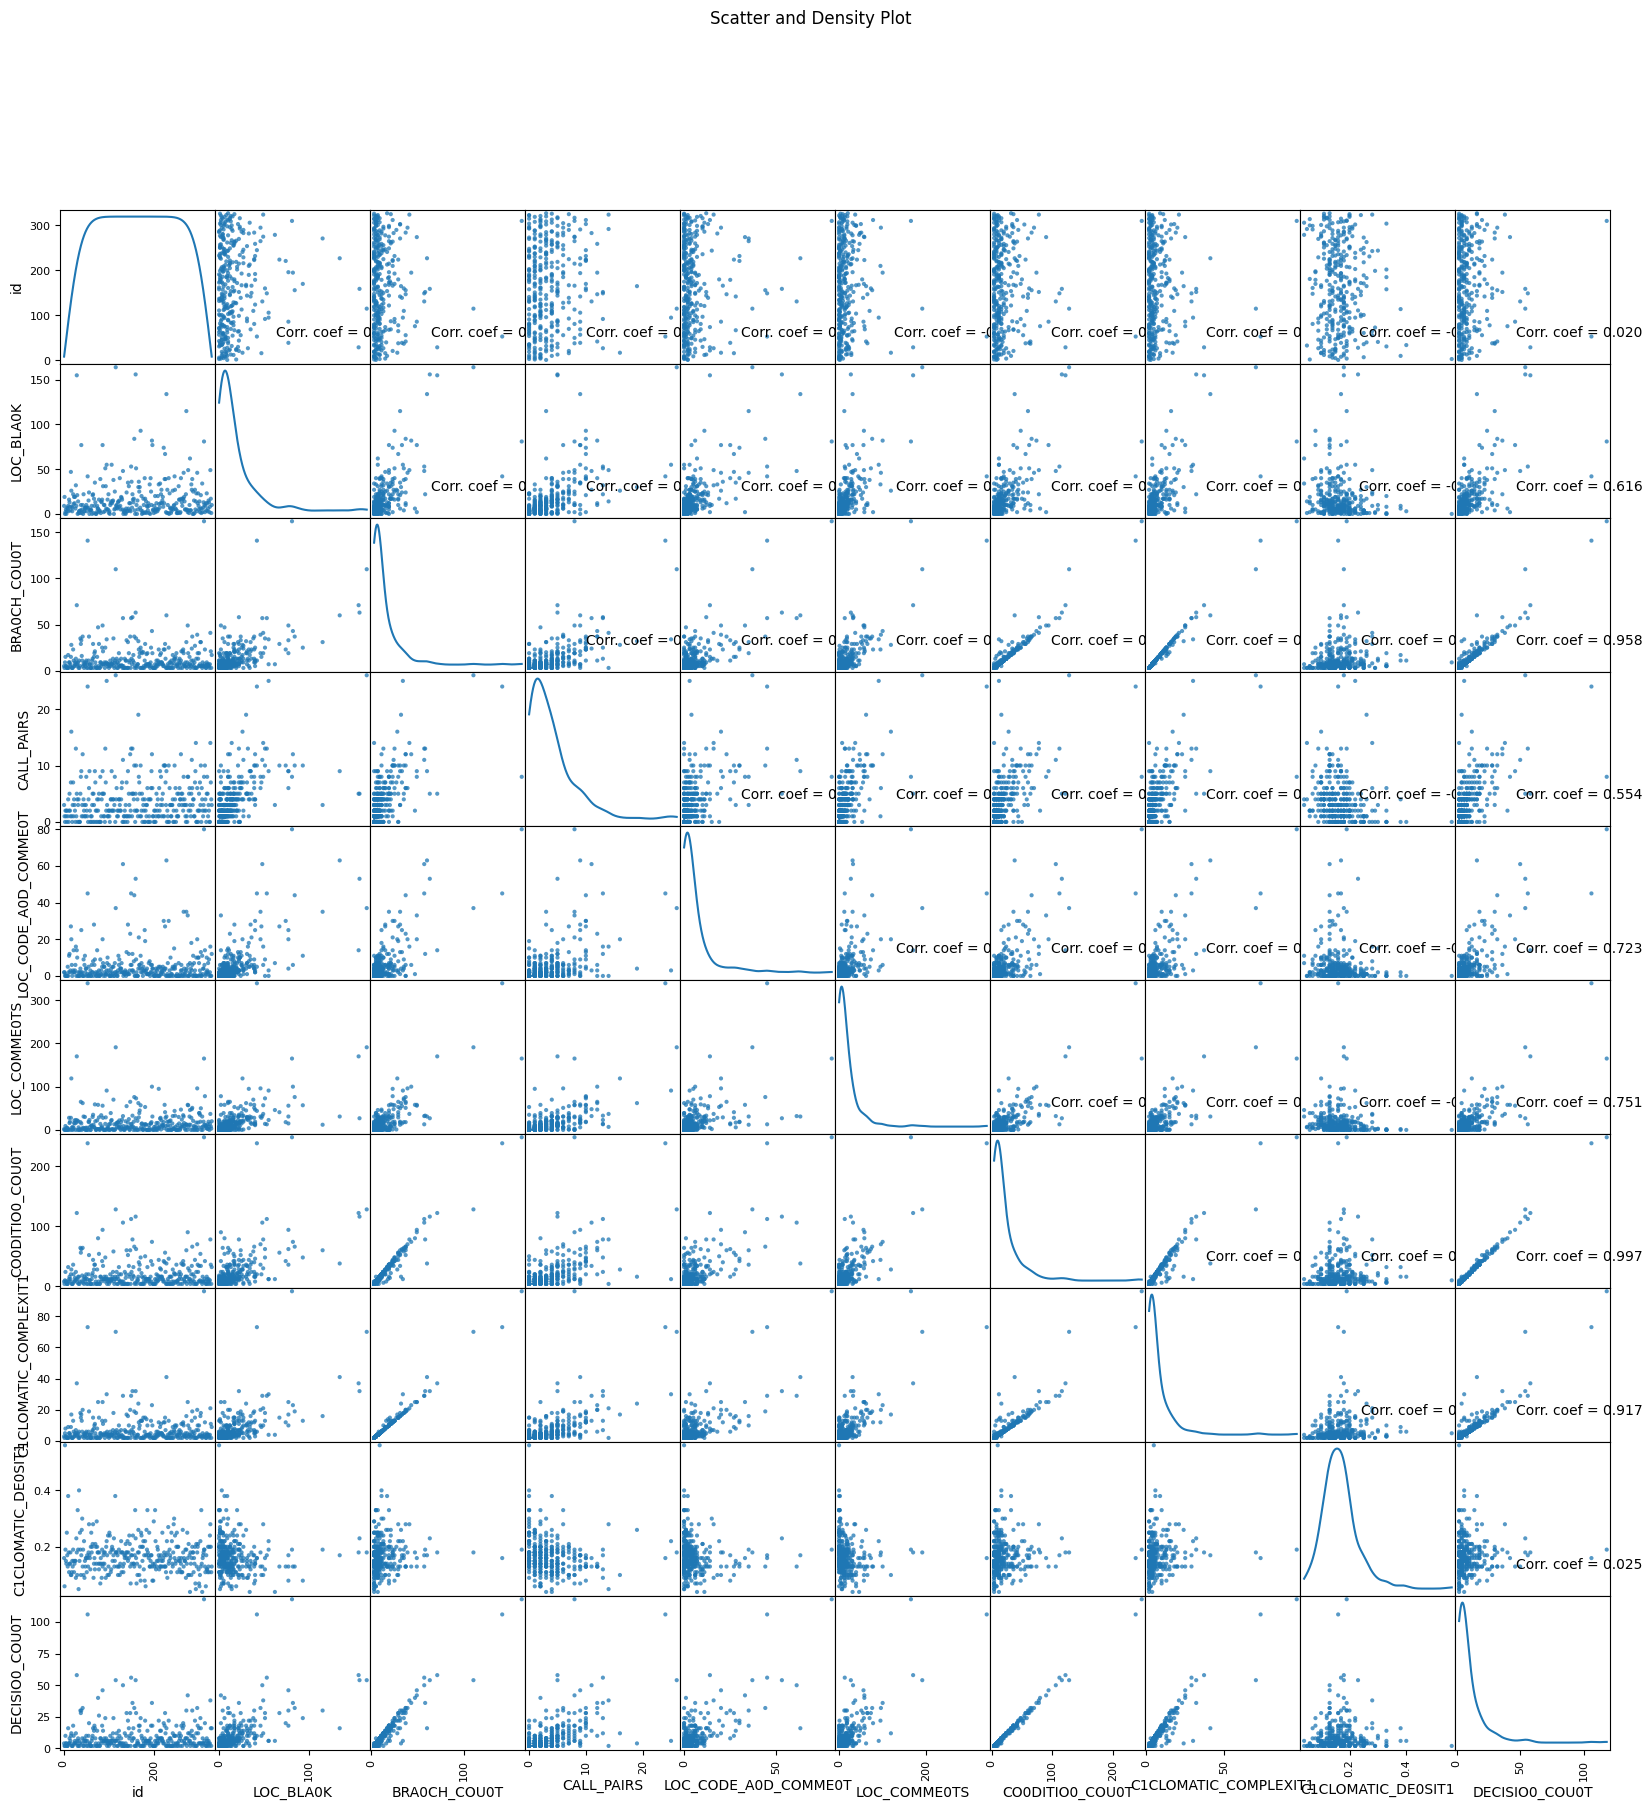

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(data, 20, 10)

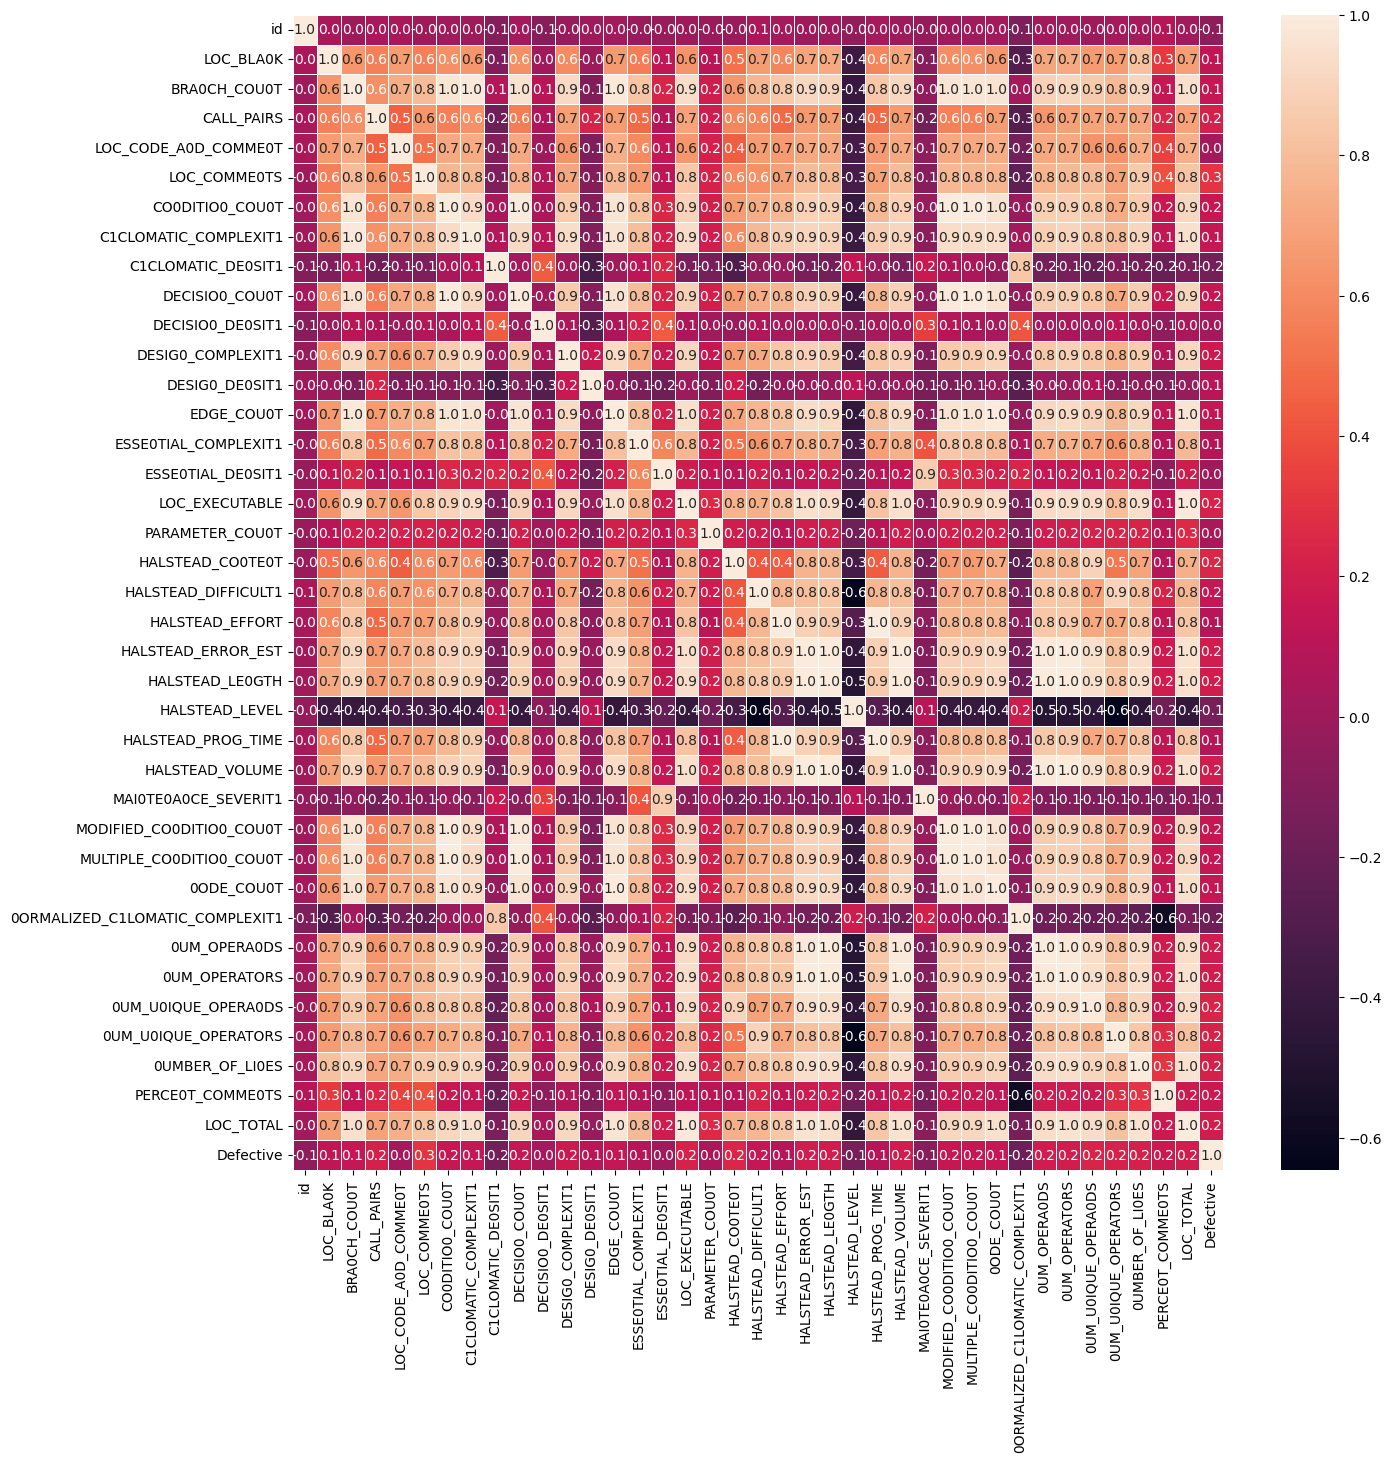

In [ ]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f')
plt.show()

In [ ]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               327 non-null    int64  
 1   LOC_BLA0K                        327 non-null    int64  
 2   BRA0CH_COU0T                     327 non-null    int64  
 3   CALL_PAIRS                       327 non-null    int64  
 4   LOC_CODE_A0D_COMME0T             327 non-null    int64  
 5   LOC_COMME0TS                     327 non-null    int64  
 6   CO0DITIO0_COU0T                  327 non-null    int64  
 7   C1CLOMATIC_COMPLEXIT1            327 non-null    int64  
 8   C1CLOMATIC_DE0SIT1               327 non-null    float64
 9   DECISIO0_COU0T                   327 non-null    int64  
 10  DECISIO0_DE0SIT1                 327 non-null    float64
 11  DESIG0_COMPLEXIT1                327 non-null    int64  
 12  DESIG0_DE0SIT1        

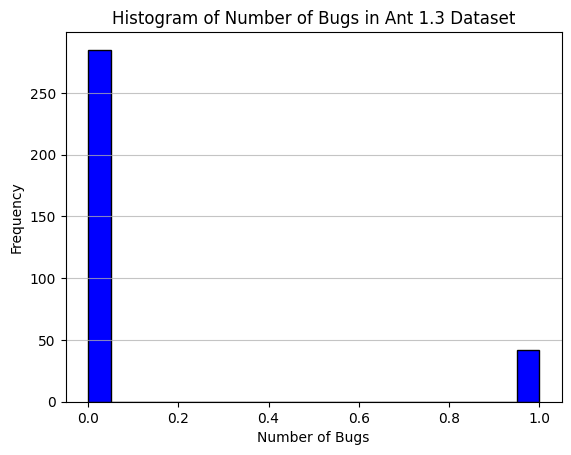

In [ ]:
# Assuming 'bugs' is the column representing the number of bugs
bugs_column = data['Defective']

# Create a histogram
plt.hist(bugs_column, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Number of Bugs in Ant 1.3 Dataset')
plt.xlabel('Number of Bugs')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()